Importing libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
mat_data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/refs/heads/main/Grades.csv')

mat_data

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


Data Exploration

In [3]:
print('Total number of students: ',len(mat_data))

Total number of students:  571


In [4]:
print("Parameter are: ",mat_data.columns)

Parameter are:  Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')


In [5]:
mat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [6]:
mat_data.describe()

,CGPA
count,571.000000
mean,2.954888
std,0.620552
min,0.800000
25%,2.538000
50%,3.029000
75%,3.451000
max,3.985000


In [7]:
mat_data.head()  

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [8]:
mat_data.tail()  

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193
570,CS-97571,C,D,D,C,C,D+,B,C+,C,...,C+,C,B-,D,F,C-,B+,D,C-,1.753


In [9]:
mat_data.isnull().any()

Seat No.     False
PH-121       False
HS-101       False
CY-105        True
HS-105/12     True
MT-111        True
CS-105       False
CS-106        True
EL-102        True
EE-119        True
ME-107        True
CS-107        True
HS-205/20     True
MT-222        True
EE-222        True
MT-224        True
CS-210        True
CS-211        True
CS-203        True
CS-214        True
EE-217        True
CS-212        True
CS-215        True
MT-331        True
EF-303        True
HS-304        True
CS-301        True
CS-302        True
TC-383        True
MT-442        True
EL-332        True
CS-318        True
CS-306        True
CS-312        True
CS-317        True
CS-403        True
CS-421        True
CS-406        True
CS-414        True
CS-419        True
CS-423        True
CS-412        True
CGPA         False
dtype: bool

In [10]:
mat_data.drop(['Seat No.'], axis=1)


,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,B,A,A,A-,A+,A,A-,A-,A+,B+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,A+,A,A,A,A,A,A,A-,A,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,B,A,A-,B+,A,A,A,A,A,B,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,A,B+,D,A,D,D+,B-,C-,B-,C-,...,D,B,B,C-,D,C,B,B-,C,2.193


Data Visualization

<Axes: >

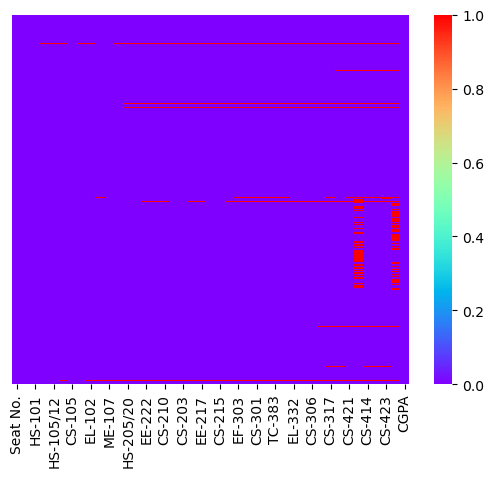

In [11]:
sns.heatmap(mat_data.isnull(),cmap="rainbow",yticklabels=False)    # To check any null values present in dataset pictorially  


<Axes: >

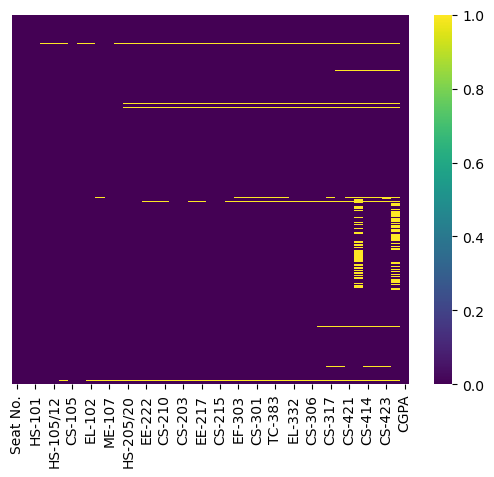

In [12]:
sns.heatmap(mat_data.isnull(),cmap="viridis",yticklabels=False)    # Map color - viridis

Machine Learning Algorithms

In [13]:
# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

# Distributions
import scipy

In [21]:
# splitting the data into training and testing data (75% and 25%)
# we mention the random state to achieve the same split everytime we run the code
X_train, X_test, y_train, y_test = train_test_split(mat_data, mat_data['CGPA'], test_size = 0.25, random_state=42)

In [22]:
X_train.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
290,CS-97291,B,C,B,C+,B+,B,B,B+,B+,...,A+,B,A-,B-,NaN,A,B,A-,B,3.071
144,CS-97145,A+,A-,A,A+,A,A,A,A-,A,...,A-,A,A+,A-,A-,A,A,A-,A,3.906
514,CS-97515,B,D,B+,A-,B-,B+,B,D,B+,...,A,B,A,A-,A-,B,A,B+,B+,3.027
245,CS-97246,B,B-,A-,C,B+,A,B-,C+,B-,...,C-,C,C,C+,A-,A-,C+,B-,A-,2.605
487,CS-97488,B,C,A,B+,B-,A,B,B-,B+,...,B+,B,A,C,B,A-,A,B-,B+,3.114


MAE - Mean Absolute Error & RMSE - Root Mean Square Error

In [16]:
def evaluate_predictions(predictions, true):
    mae = np.mean(abs(predictions - true))
    rmse = np.sqrt(np.mean((predictions - true) ** 2))

    return mae, rmse

In [17]:
# find the median
median_pred = X_train['CGPA'].median()

# create a list with all values as median
median_preds = [median_pred for _ in range(len(X_test))]

# store the true G3 values for passing into the function
true = X_test['CGPA']

In [18]:
# Display the naive baseline metrics
mb_mae, mb_rmse = evaluate_predictions(median_preds, true)
print('Median Baseline  MAE: {:.4f}'.format(mb_mae))
print('Median Baseline RMSE: {:.4f}'.format(mb_rmse))

Median Baseline  MAE: 0.4825
Median Baseline RMSE: 0.5722


In [19]:
# Evaluate several ml models by training on training set and testing on testing set
def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression', 'ElasticNet Regression',
                      'Random Forest', 'Extra Trees', 'SVM',
                       'Gradient Boosted', 'Baseline']
    X_train = X_train.drop('CGPA', axis='columns')
    X_test = X_test.drop('CGPA', axis='columns')
    
    # Instantiate the models
    model1 = LinearRegression()
    model2 = ElasticNet(alpha=1.0, l1_ratio=0.5)
    model3 = RandomForestRegressor(n_estimators=100)
    model4 = ExtraTreesRegressor(n_estimators=100)
    model5 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
    model6 = GradientBoostingRegressor(n_estimators=50)
    
    # Dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse'], index = model_name_list)
    
    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4, model5, model6]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        # Metrics
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
        
        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse]
    
    # Median Value Baseline Metrics
    baseline = np.median(y_train)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))
    
    results.loc['Baseline', :] = [baseline_mae, baseline_rmse]
    
    return results